<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z%20/regression/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls -ltr /content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_5_Multiple_Linear_Regression/Python/50_Startups.csv

-rw------- 1 root root 2436 Apr  7  2020 /content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_5_Multiple_Linear_Regression/Python/50_Startups.csv


In [3]:
data_source = "/content/drive/MyDrive/ML_A_Z/Part_2_Regression/Section_5_Multiple_Linear_Regression/Python/50_Startups.csv"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(data_source)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [9]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,random_state=123,test_size=0.3
)

In [ ]:
from sklearn.linear_model import LinearRegression

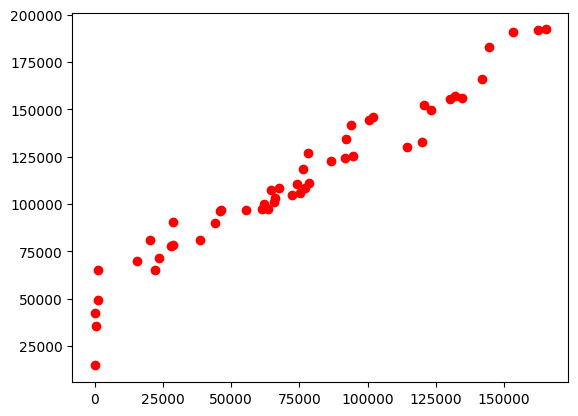

In [11]:
%matplotlib inline

plt.scatter(df['R&D Spend'],df['Profit'],color="red")

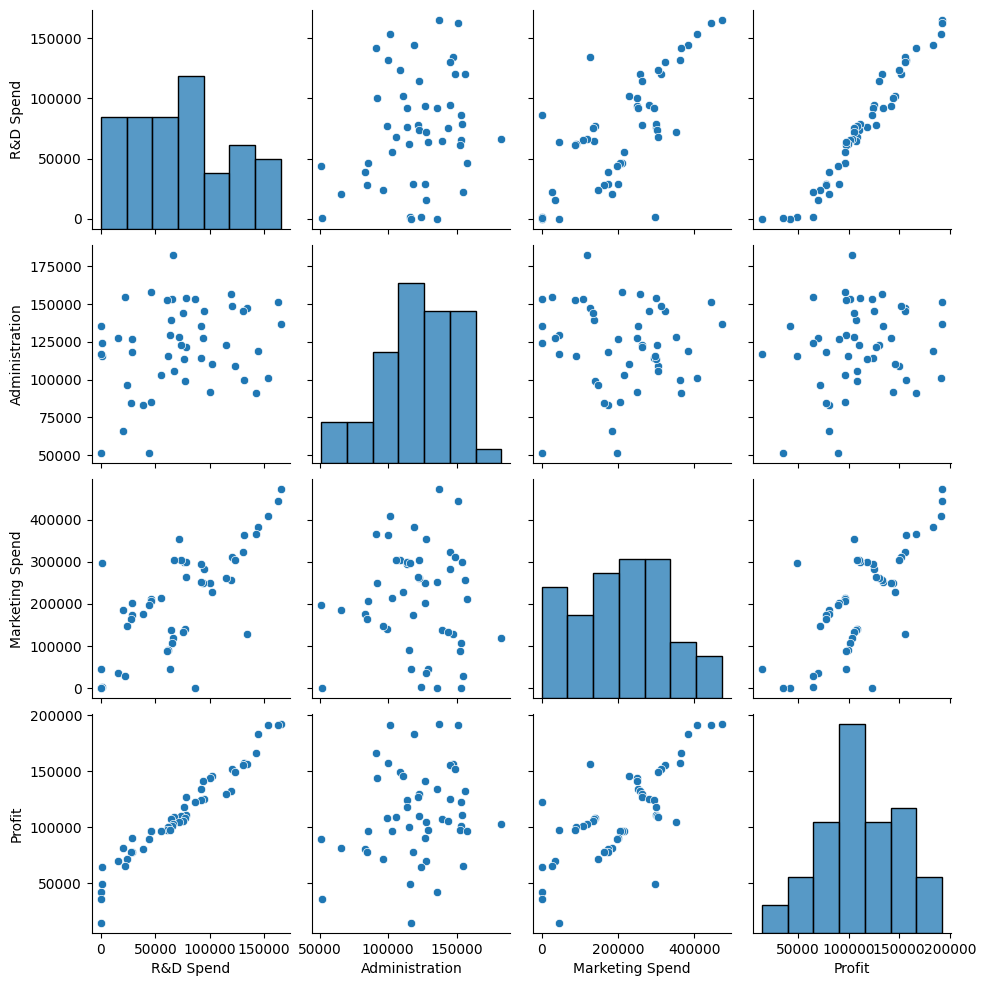

In [12]:
import seaborn as sns
sns.pairplot(df)

In [19]:
# dummy variables (OneHotEncoding)
#pd.get_dummies(df.State)

# using sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers = [('encoder',OneHotEncoder(),[3])],remainder='passthrough'
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=123
)

In [21]:
X_train

array([[0.0, 0.0, 1.0, 78389.47, 153773.43, 299737.29],
       [1.0, 0.0, 0.0, 0.0, 135426.92, 0.0],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.06],
       [0.0, 0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0,

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

array([133749.91948848, 126771.56418163,  97712.50104996,  58138.82512335,
       128196.536732  , 192274.03929241,  75126.75206537, 127984.52000745,
       101453.65842153, 151532.50862835])

In [24]:
lr

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test)

[133749.91948848 126771.56418163  97712.50104996  58138.82512335
 128196.536732   192274.03929241  75126.75206537 127984.52000745
 101453.65842153 151532.50862835]
[146121.95 134307.35  99937.59  49490.75 124266.9  192261.83  78239.91
 141585.52 101004.64 152211.77]


In [27]:
np.set_printoptions(precision=2)

In [30]:
pred_test = (
    np.concatenate(
        (y_pred.reshape(len(y_pred),1),
         y_test.reshape(len(y_test),1)),axis=1
        )
    )
print(pred_test)

[[133749.92 146121.95]
 [126771.56 134307.35]
 [ 97712.5   99937.59]
 [ 58138.83  49490.75]
 [128196.54 124266.9 ]
 [192274.04 192261.83]
 [ 75126.75  78239.91]
 [127984.52 141585.52]
 [101453.66 101004.64]
 [151532.51 152211.77]]


TypeError: ignored